# Import Library

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 8.4MB/s 


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#unsupervised learning library
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [5]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [7]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# 1. Problem Framing

- Bussiness Objective yang ingin dicapai melalui proyek ini adalah kita dapat memprediksi tamu hotel dengan nilai akurasi yang tinggi
terhadap tamu hotel yang akan mengcancel bookingnya dari jauh hari berdasarkan fitur yang tersedia.
- Output yang akan dihasilkan dari proyek ini adalah akan menghasilkan aplikasi untuk memprediksi tamu hotel yang diperkirakan akan mengcancel penginapanya dengan nilai akurasi yang tinggi.
- dilihat dari data set nya, machine learning yang akan saya lakukan untuk membuat prediksi ini dilakukan secara 'supervised'. Karena target yang dimaksud adalah 'cancelation' dimana data tersebut hanya mempunyai 2 data, maka data ini merupakan data cllassification. Data pada kolom mempunyai 32 kolom, jika hasil prediksi masih belum memuaskan karena data yang terlalu banyak, mungkin nanti akan dilakukan 'dimensional reduction' agar proses pengolahan data lebih mudah
- Nilai akurasi yang diperoleh didapat dari nilai 'Accuracy Score' dari beberapa classifier yang nantinya akan dipilih classifier yang terbaik
- Jika terjadi kesalahan prediksi, hal yang mungkin terjadi adalah terdapat 2 orang (tidak saling kenal) yang akan menempati kamar yang sama. Hal tersebut akan menambah pekerjaan resepsionis untuk mengalihkan salah satunya ke kamar lain yang masih tersedia.

#2. Explanatory Data Analysis(EDA)

In [11]:
#cek persebaran data dari masing2 kolom
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
#cek apakah ada data yg kosong
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Berdasarkan pengamatan missinf values diatas, dapat kita amati bahwa terdapat 4 kolom yang mempunya missing values. Yaitu kolom children, contry, agent, dan company.


In [12]:
#1. Cek data children
hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Tamu hotel lebih banyak tidak membawa anak daripada membawa, oleh karena itu, kita dapat mengisi missing value pada children dengan data terbanyak yaitu tidak membawa anak (0)

In [13]:
hotel['children'].fillna(0,inplace=True)

In [14]:
#2. Cek data Country
hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PYF        1
AIA        1
GUY        1
BHS        1
NAM        1
Name: country, Length: 177, dtype: int64

Kebanyakan tamu hotel berkewarganegaraan portugal. oleh karena itu, kita dapat mengisi missing values dari country dengan mengasumsikan missing values tersebut berkewarganegaraan portugal.

In [15]:
hotel['country'].fillna('PRT',inplace=True)

3. Agent Dan Company

Dilihat dari keseluruhan data, agent dan company memiliki missing values yang sangat banyak (company lebih dari 90% missing values). Berdasarkan hal tersebut dapat kita asumsikan bahwa kebanyakan pelanggan hotel tidak mengisi / memiliki agent / company id. Karena data yang terlalu banyak, untuk mempermudah proses data, kita akan 'drop' kedua kolom tersebut.

In [17]:
hotel.drop(['agent','company'],axis=1,inplace=True)

In [18]:
# Cek apakah masih terdapat missing values
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

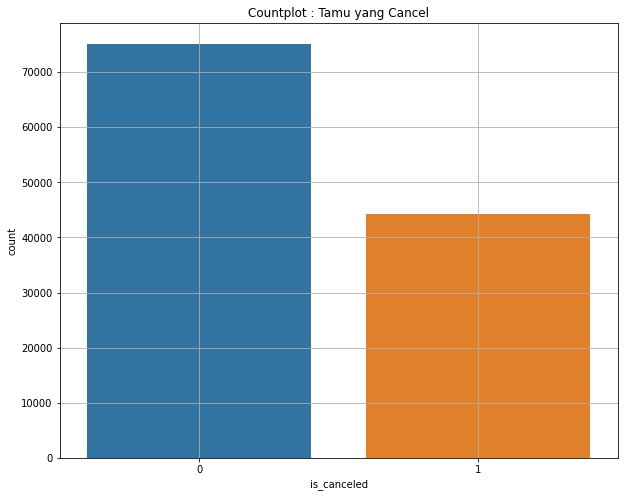

In [112]:
#Cek seberapa banyak tamu yang mengcancel bookingnya
plt.figure(figsize=(10,8))
sns.countplot('is_canceled',data=hotel)
plt.title('Countplot : Tamu yang Cancel')
plt.grid()
plt.show()

Dapat dilihat bahwa perbandingan tamu yang confirm dan cancel mempunyai perbandingan 75:45 atau sekitar 37% tamu mengcancel booking nya


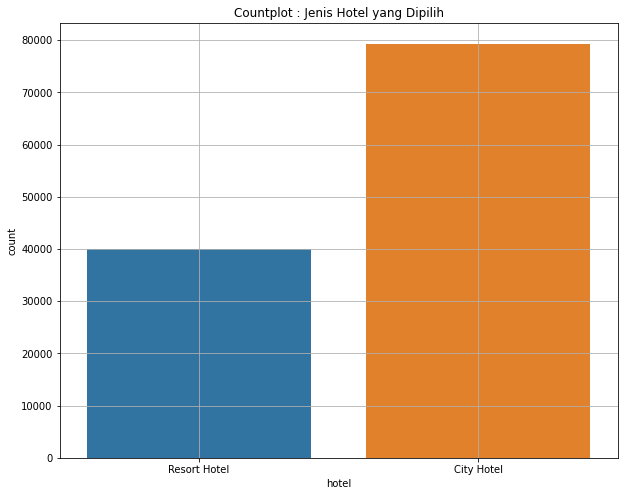

In [113]:
#Cek sebaran data tamu berdasarkan jenis hotel
plt.figure(figsize=(10,8))
sns.countplot('hotel',data=hotel)
plt.title('Countplot : Jenis Hotel yang Dipilih')
plt.grid()
plt.show()

Dapat dilihat bahwa hampir 80.000 orang dari 120.000 orang lebih memilih untuk liburan di city hotel daripada di resort hotel (sekitar 67% memilih liburan di city hotel)

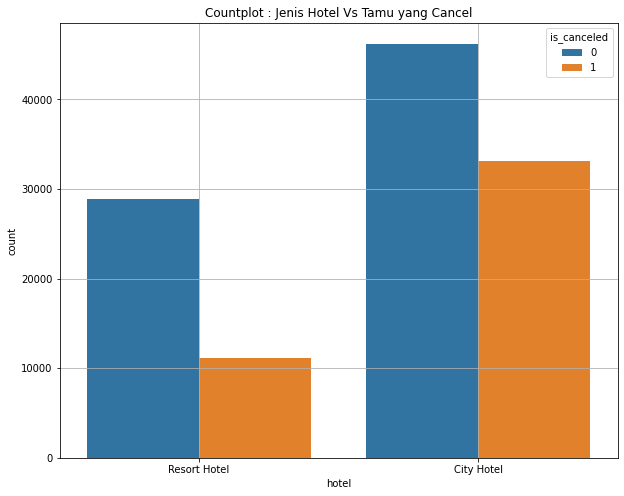

In [37]:
#Cek sebaran data tipe hotel vs tamu yang cancel
plt.figure(figsize=(10,8))
sns.countplot('hotel',data=hotel,hue='is_canceled')
plt.title('Countplot : Jenis Hotel Vs Tamu yang Cancel')
plt.grid()
plt.show()

Dilihat dari plot diatas, terlihat bahwa lebih banyak tamu yang lebih memilih city hotel daripada resort hotel.

Jika dilihat dari jumlah tamu yang cancel. Dikedua jenis hotel memiliki jumlah tamu yang batal yang masih banyak (sekitar 30% pada resort hotel dan sekitar 70% pada city hotel) hal ini dapat menyebabkan kerugian hotel karena tamunya tidak jadi menginap

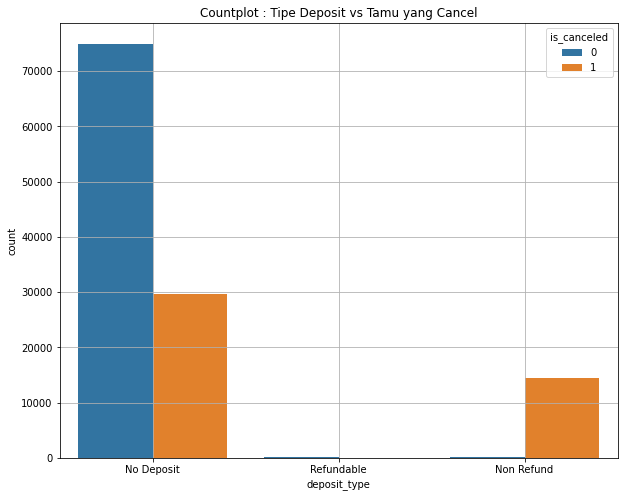

In [38]:
#Cek sebaran data tipe deposit vs tamu yang cancel
plt.figure(figsize=(10,8))
sns.countplot('deposit_type',data=hotel,hue='is_canceled')
plt.title('Countplot : Tipe Deposit vs Tamu yang Cancel')
plt.grid()
plt.show()

Tipe deposit vs tamu yg cancel menunjukan data yang tidak wajar. Hotel dengan tipe non deposit memiliki hampir 30.000 tamu yang tidak jadi menginap di hotel tersebut. Namun hotel yang memiliki tipe deposit non refund justru memiliki tingkat pembatalan yang lebih rendah.

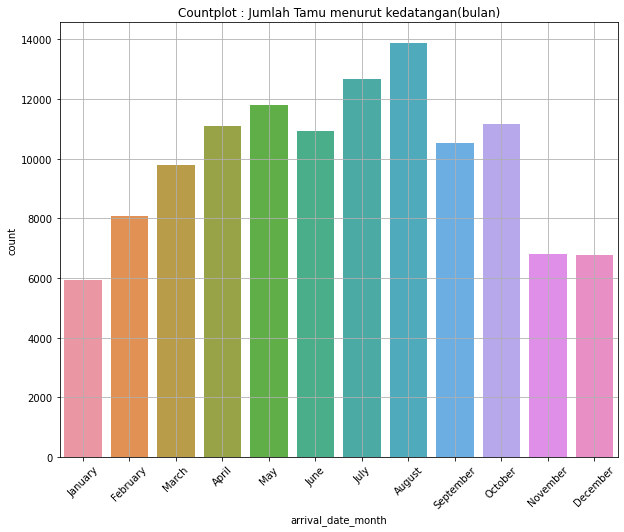

In [49]:
#cek sebaran data tamu menurut kedatangan(bulan)
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,8))
sns.countplot('arrival_date_month',data=hotel,order=month_sorted)
plt.title('Countplot : Jumlah Tamu menurut kedatangan(bulan)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Dapat dilihat bahwa jumlah tamu yang booking kebanyakan pada bulan May hingga Agustus(Libur sekolah). Namun pada November - January (Libur tahun baru) justru tidak banyak tamu yang berkunjung

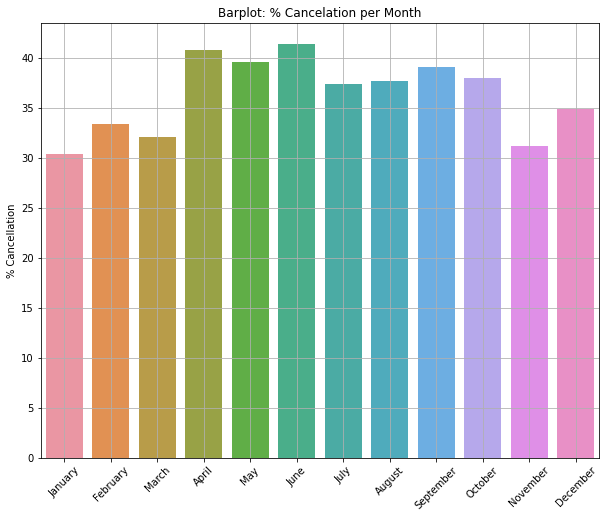

In [50]:
#Cek tamu yang cancel berdasarkan bulan
#Membuat dataframe baru berdasarkan bulan kedatangan dan cancellation
month_cancel = pd.DataFrame(hotel[hotel['is_canceled']==1]['arrival_date_month'].value_counts()*100/hotel['arrival_date_month'].value_counts())
plt.figure(figsize=(10,8))
sns.barplot(x=month_cancel.index,y='arrival_date_month',order=month_sorted,data=month_cancel)
plt.ylabel('% Cancellation')
plt.title('Barplot: % Cancelation per Month')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Jika dilihat dari persen jumlah tamu yang batal, tidak terlihat perbedaan yang signifikan. Dapat kita simpulkan bahwa bulan kedatangan tamu tidak mempengaruhi tamu akan cancel.

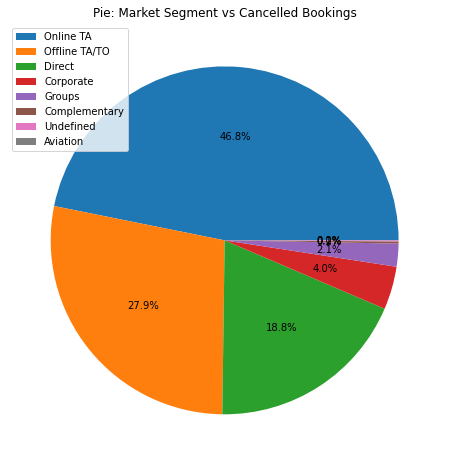

In [61]:
#Cek sebaran data pengujung tamu yang cancel berdasarkan market segmen nya
#Membuat DataFrame tamu yang cancel
canceled_data = hotel[hotel['reservation_status']=='Canceled']

plt.figure(figsize=(10,8))
plt.pie(canceled_data['market_segment'].value_counts(),
        autopct = '%.1f%%')
plt.legend(canceled_data['market_segment'].unique(),loc='upper left')
plt.title('Pie: Market Segment vs Cancelled Bookings')
plt.show()

Pie chart dipilih agar kita lebih mudah membagi market segment kebeberapa bagian. Dapat dilihat bahwa sekitar 70% orang yang mengcancel berasar dari online maupun offline Travel Agent.

#3. Data Preparation

In [65]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [64]:
#Membuat data frame yang berisikan fitur yang akan dipakai
df = hotel[['hotel','is_canceled','lead_time','adults','children','babies','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','deposit_type','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests']]
df

,hotel,is_canceled,lead_time,adults,children,babies,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2,0.0,0,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2,0.0,0,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,1,0.0,0,Direct,Direct,0,0,0,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,1,0.0,0,Corporate,Corporate,0,0,0,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2,0.0,0,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,0.0,0,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,3,0.0,0,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2,0.0,0,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2,0.0,0,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,104.40,0,0


Dari 30 kolom, saya hanya memilih 18 fitur yang nantinya akan di kategorikan kembali. Fitur yang saya buang diantaranyaa kedatangan tamu, makanan, tipe kamar yang diminta dan yang diberikan, serta kewarganegaraan yang tidak berkorelasi dengan apakah tamu tersebut akan cancel atau tidak.

Kolom hotel, market segment, distribution channel, dan customer type merupakan data kategorikal. oleh karena itu data tersebut akan diubah menjadi data yang berupa int agar dapat diolah menggunakan metode 'binary encoders'

In [78]:
bin_target = df[['hotel','market_segment','distribution_channel','deposit_type','customer_type']]

binary_encoder = ce.BinaryEncoder()
df_binary = binary_encoder.fit_transform(bin_target)
df_binary


,hotel_0,hotel_1,market_segment_0,market_segment_1,market_segment_2,market_segment_3,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,deposit_type_0,deposit_type_1,deposit_type_2,customer_type_0,customer_type_1,customer_type_2
0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1
119386,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1
119387,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1
119388,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1


Agar data lebih sedikit, kita drop kolom pertama dari masing2 kategori yang telah melewati tahap encoding

In [79]:
df_binary.drop(['hotel_0','market_segment_0','distribution_channel_0','deposit_type_0','customer_type_0'],axis=1,inplace=True)
df_binary

,hotel_1,market_segment_1,market_segment_2,market_segment_3,distribution_channel_1,distribution_channel_2,distribution_channel_3,deposit_type_1,deposit_type_2,customer_type_1,customer_type_2
0,1,0,0,1,0,0,1,0,1,0,1
1,1,0,0,1,0,0,1,0,1,0,1
2,1,0,0,1,0,0,1,0,1,0,1
3,1,0,1,0,0,1,0,0,1,0,1
4,1,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,1,1,0,1,0,1
119386,0,0,1,1,0,1,1,0,1,0,1
119387,0,0,1,1,0,1,1,0,1,0,1
119388,0,0,1,1,0,1,1,0,1,0,1


In [88]:
#Menggabungkan semua data kembali
df_not_encoded = df.drop(bin_target,axis=1)
df_final = pd.concat([df_not_encoded,df_binary],axis=1)
df_final

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_1,market_segment_1,market_segment_2,market_segment_3,distribution_channel_1,distribution_channel_2,distribution_channel_3,deposit_type_1,deposit_type_2,customer_type_1,customer_type_2
0,0,342,2,0.0,0,0,0,0,3,0,0.00,0,0,1,0,0,1,0,0,1,0,1,0,1
1,0,737,2,0.0,0,0,0,0,4,0,0.00,0,0,1,0,0,1,0,0,1,0,1,0,1
2,0,7,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,1,0,0,1,0,1,0,1
3,0,13,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,1,0,0,1,0,0,1,0,1
4,0,14,2,0.0,0,0,0,0,0,0,98.00,0,1,1,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,0.0,0,0,0,0,0,0,96.14,0,0,0,1,0,0,0,1,1,0,1,0,1
119386,0,102,3,0.0,0,0,0,0,0,0,225.43,0,2,0,0,1,1,0,1,1,0,1,0,1
119387,0,34,2,0.0,0,0,0,0,0,0,157.71,0,4,0,0,1,1,0,1,1,0,1,0,1
119388,0,109,2,0.0,0,0,0,0,0,0,104.40,0,0,0,0,1,1,0,1,1,0,1,0,1


In [89]:
#cek bahwa sudah tidak ada data kategorikal dalam dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   adults                          119390 non-null  int64  
 3   children                        119390 non-null  float64
 4   babies                          119390 non-null  int64  
 5   is_repeated_guest               119390 non-null  int64  
 6   previous_cancellations          119390 non-null  int64  
 7   previous_bookings_not_canceled  119390 non-null  int64  
 8   booking_changes                 119390 non-null  int64  
 9   days_in_waiting_list            119390 non-null  int64  
 10  adr                             119390 non-null  float64
 11  required_car_parking_spaces     119390 non-null  int64  
 12  total_of_special

# 4. Model Training

In [90]:
df_final

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_1,market_segment_1,market_segment_2,market_segment_3,distribution_channel_1,distribution_channel_2,distribution_channel_3,deposit_type_1,deposit_type_2,customer_type_1,customer_type_2
0,0,342,2,0.0,0,0,0,0,3,0,0.00,0,0,1,0,0,1,0,0,1,0,1,0,1
1,0,737,2,0.0,0,0,0,0,4,0,0.00,0,0,1,0,0,1,0,0,1,0,1,0,1
2,0,7,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,0,1,0,0,1,0,1,0,1
3,0,13,1,0.0,0,0,0,0,0,0,75.00,0,0,1,0,1,0,0,1,0,0,1,0,1
4,0,14,2,0.0,0,0,0,0,0,0,98.00,0,1,1,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,0.0,0,0,0,0,0,0,96.14,0,0,0,1,0,0,0,1,1,0,1,0,1
119386,0,102,3,0.0,0,0,0,0,0,0,225.43,0,2,0,0,1,1,0,1,1,0,1,0,1
119387,0,34,2,0.0,0,0,0,0,0,0,157.71,0,4,0,0,1,1,0,1,1,0,1,0,1
119388,0,109,2,0.0,0,0,0,0,0,0,104.40,0,0,0,0,1,1,0,1,1,0,1,0,1


In [93]:
#Tentukan X dan y
X = df_final.drop('is_canceled',axis=1)
y = df_final['is_canceled']

In [94]:
#Train test X dan y
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size=0.8,random_state=2020)

Karena data memiliki rentang nilai yang berbeda (lead time memiliki nilai ratusan sedangkan is canceled hanya memiliki 1 dan 0) diperlukan normalisasi data menggunakan StandardScaler

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Model yang akan dipilih disini adalah Logistic Regrression, KNN, serta Random Forest. Model tersebut dipilih karena ketiga model tadi merupakan model yang paling umum.

In [104]:
#LogReg
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred = logreg.predict(X_test_scaled)

print('LogReg Accuracy Score:',accuracy_score(y_test,y_pred))

LogReg Accuracy Score: 0.8072702906441076


In [103]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

print('KNN Accuracy Score:',accuracy_score(y_test,y_pred))

KNN Accuracy Score: 0.8017945389061061


In [105]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

print('RandomForest Accuracy Score:',accuracy_score(y_test,y_pred))

RandomForest Accuracy Score: 0.8109033419884413


#5. Evaluation, Model Selection, Model Tuning

Dari ketiga classifier yang diuji, ketiganya memiliki nilai akurasi yang tidak jauh berbeda. Namun dari ketiga classifier tersebut. Random Forest memiliki nilai akurasi yang paling baik sebesar 81%. Oleh karena itu kita akan men tuning Random Forest untuk melihat apakah ada kenaikan performa

In [109]:
grid_param = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,
                           param_grid=grid_param,
                           scoring='accuracy',
                           n_jobs= -1)
grid_search.fit(X_train_scaled,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [110]:
#Hasil dari GridSearch
print('Best Score:',grid_search.best_score_)
print('Best Param:',grid_search.best_params_)

Best Score: 0.8210065423101547
Best Param: {'criterion': 'entropy', 'n_estimators': 500}


Setelah didapat best param, kita akan melatih kembali dataset menggunakan parameter yang baru dan membandingkan hasilnya dengan RandomForest sebelum di tuning

In [111]:
opt_rf = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=2020)
opt_rf.fit(X_train_scaled,y_train)
y_pred = opt_rf.predict(X_test_scaled)

print('Optimized Random Forest Accuracy:',accuracy_score(y_test,y_pred))

Optimized Random Forest Accuracy: 0.811793282519474


#6. Result, Conclusion, and Recommendation

Setelah mengolah data, dapat kita tarik beberapa kesimpulan berdasarkan EDA, yaitu:
- 91% pengunjung hotel tidak membawa anak
- 40% pengunjung berasal dari portugal
- 37% tamu cendrung mengcancel booking
- 67% tamu lebih memilih City Hotel daripada Resort Hotel
- Jumlah tamu yang mengcancel di tipe hotel 'Refund' lebih banyak daripada tipe hotel 'Non Refund' (Anomali)
- Hotel booking terbanyak terjadi pada rentang bulan May - Agustus. Pada rentang November - Januari justru merupakan bulan dengan jumlah booking paling sedikit (Anomali)
- Waktu kedatangan (bulan) tamu tidak mempengaruhi booking cancel
- 70% tamu berasal dari travel agen

Kemudian kita melakukan fitur seleksi dan 'fitur engineering' dan menghasilkan model prediksi menggunakan 'Random Forest' Classifier untuk memprediksi apakah tamu akan meng cancel bookingnya atau tidak. Dan didapat 81.17% Akurasi

Nilai 81.17% merupakan nilai yang baik untuk memprediksi apakah tamu akan meng cancel bookingnya atau tidak. Dengan ini, hotel bisa mengalihkan kamar yang telah dibooking kepada orang lain dengan memnimalisir terjadinya kerugian (kamar kosong) oleh tamu yang cancel tadi sejak jauh hari bahkan sebelum tamu tersebut menyatakan akan cancel.

Model yang saya buat masih dapat di optimalkan kembali dengan cara memilih fitur yang lebih banyak. serta menggunakan klasifier yang lebih bervariasi lagi agar dapat terlihat perbedaan nilai antar klasifier.